## DATA 240: Bonus Assignment: 2

Please tune your hyperparameters (learning rate, batch size, number of epochs, etc.) to get the best results of
accuracy, precision, and recall for test dataset.
Please plot ROC curve and calculate AUC for train and test dataset for your best result. \

**NOTE:** You need to get more than 10 data points for ROC curve.\
Please include the curve corresponding to the base binary classification model.\
Please do not use any package for ROC curve and AUC calculation. You need to draw ROC curve using Matplotlib and calculate AUC from scratch. 

#### Carrying forward from the Assignment 3 as this is the continuation from assignment no. 3 question 2

## 2. Binary classification with logistic regression 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
heart_train = pd.read_csv('heart_disease_train.csv')

In [3]:
heart_test = pd.read_csv('heart_disease_test.csv')

In [4]:
heart_train.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0,0
1,1,45,3.0,0,0.0,0.0,0,0,0,162.0,125.0,89.0,27.98,85.0,83.0,0
2,0,51,1.0,1,2.0,0.0,0,0,0,261.0,127.0,81.0,20.24,75.0,96.0,0
3,1,45,3.0,1,30.0,0.0,0,0,0,250.0,126.0,89.5,28.68,75.0,92.0,0
4,0,45,2.0,1,3.0,0.0,0,0,0,250.0,130.0,80.0,20.24,90.0,86.0,0


In [5]:
heart_test.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,56,1.0,0,0.0,0.0,0,1,1,273.0,136.0,80.0,27.73,90.0,210.0,1
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80.0,NaN,0
3,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
4,1,69,1.0,1,1.0,0.0,0,0,0,245.0,123.0,77.0,26.58,70.0,81.0,1


In [6]:
heart_train.dtypes

gender               int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [7]:
heart_test.dtypes

gender               int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

Checking missing values on both heart_train and heart_test

In [8]:
heart_train.isna().sum()

gender               0
age                  0
education           84
currentSmoker        0
cigsPerDay          25
BPMeds              42
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             44
sysBP                0
diaBP                0
BMI                 16
heartRate            1
glucose            315
TenYearCHD           0
dtype: int64

In [9]:
heart_test.isna().sum()

gender              0
age                 0
education          21
currentSmoker       0
cigsPerDay          4
BPMeds             11
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             6
sysBP               0
diaBP               0
BMI                 3
heartRate           0
glucose            73
TenYearCHD          0
dtype: int64

Checking the shape

In [10]:
heart_train.shape

(3390, 16)

In [11]:
heart_test.shape

(848, 16)

In [12]:
heart_train['education'].unique()

array([ 1.,  3.,  2.,  4., nan])

In [13]:
heart_test['education'].unique()

array([ 1.,  2.,  3., nan,  4.])

In [14]:
heart_train['cigsPerDay'].unique()

array([ 0.,  2., 30.,  3., 20., 15., 35., 23., 10.,  1., nan, 11., 40.,
        5.,  9., 17., 16., 43., 12., 25.,  7.,  6.,  4., 50.,  8., 60.,
       18., 70., 13., 38., 14., 45., 19.])

In [15]:
heart_test['cigsPerDay'].unique()

array([ 0., 23.,  1., 20., 30.,  7., 10.,  3.,  5.,  9., 43., 40., 15.,
        6., 35., 25., 13.,  2., 60., 18., nan, 11., 29., 12., 45.,  8.,
       17.])

In [16]:
heart_train['BPMeds'].unique()

array([ 0.,  1., nan])

In [17]:
heart_test['BPMeds'].unique()

array([ 0.,  1., nan])

Checking the statistics of both the train and test set

In [18]:
heart_train.describe()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3306.000000,3390.000000,3365.000000,3348.000000,3390.000000,3390.000000,3390.000000,3346.000000,3390.000000,3390.000000,3374.000000,3389.000000,3075.000000,3390.000000
mean,0.433628,49.614159,1.981246,0.486726,8.962556,0.028375,0.004720,0.302065,0.024779,236.759713,132.126696,82.752065,25.793874,75.776335,82.023089,0.152212
std,0.495648,8.609617,1.023009,0.499897,12.030447,0.166067,0.068548,0.459221,0.155473,45.347259,22.047822,11.933836,4.045690,11.952094,23.934546,0.359280
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,50.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,116.500000,74.500000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,233.500000,128.000000,82.000000,25.425000,75.000000,78.000000,0.000000
75%,1.000000,57.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,143.500000,89.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [19]:
heart_test.describe()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,848.000000,848.000000,827.000000,848.000000,844.000000,837.000000,848.000000,848.000000,848.000000,842.000000,848.000000,848.000000,845.000000,848.000000,775.000000,848.000000
mean,0.411557,49.468160,1.969770,0.523585,9.164692,0.034648,0.010613,0.344340,0.029481,236.570071,133.254717,83.458726,25.834485,76.288915,81.743226,0.150943
std,0.492406,8.424758,1.007385,0.499738,11.475080,0.182995,0.102533,0.475433,0.169251,41.471282,21.989009,11.808590,4.217051,12.318492,24.074923,0.358205
min,0.000000,33.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145.000000,92.000000,48.000000,16.750000,45.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.875000,75.500000,23.060000,67.750000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,1.000000,1.500000,0.000000,0.000000,0.000000,0.000000,235.000000,129.000000,82.500000,25.310000,75.000000,77.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,261.750000,144.500000,90.000000,27.930000,85.000000,86.000000,0.000000
max,1.000000,69.000000,4.000000,1.000000,60.000000,1.000000,1.000000,1.000000,1.000000,453.000000,215.000000,140.000000,51.280000,125.000000,325.000000,1.000000


### Imputing Missing Values in heart_train and heart_test

Data Imputation: Using subclass methods to handle the missing values. 
For numerical features, we could use mean or median imputation, while for categorical features, mode imputation is suitable.

In order to fill the missing values with sub class, we need to find what features are related with each other the most. For that, we have used the correlation matrix to identify features most strongly correlated with the column containing missing values.

In [20]:
heart_train.corr()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
gender,1.000000,-0.021699,0.017740,0.197109,0.312110,-0.063121,0.000538,-0.003935,0.021348,-0.075607,-0.041278,0.057516,0.090680,-0.117163,0.017359,0.093203
age,-0.021699,1.000000,-0.156948,-0.218453,-0.186060,0.126578,0.068083,0.304355,0.110090,0.262306,0.386243,0.204637,0.142417,-0.018992,0.121737,0.215881
education,0.017740,-0.156948,1.000000,0.011334,0.003289,-0.002784,-0.032811,-0.062608,-0.044612,-0.009843,-0.113493,-0.043689,-0.122646,-0.048114,-0.033716,-0.036786
currentSmoker,0.197109,-0.218453,0.011334,1.000000,0.771015,-0.047996,-0.032615,-0.096925,-0.048919,-0.051385,-0.130769,-0.103222,-0.164121,0.057198,-0.057929,0.022754
cigsPerDay,0.312110,-0.186060,0.003289,0.771015,1.000000,-0.043402,-0.029953,-0.063781,-0.046534,-0.021426,-0.090941,-0.055125,-0.091066,0.078196,-0.067160,0.054683
BPMeds,-0.063121,0.126578,-0.002784,-0.047996,-0.043402,1.000000,0.069341,0.260374,0.066023,0.098285,0.253094,0.197538,0.090651,0.013199,0.062359,0.103217
prevalentStroke,0.000538,0.068083,-0.032811,-0.032615,-0.029953,0.069341,1.000000,0.085928,0.016710,0.008202,0.047633,0.041469,0.031158,-0.022485,0.015608,0.078652
prevalentHyp,-0.003935,0.304355,-0.062608,-0.096925,-0.063781,0.260374,0.085928,1.000000,0.072848,0.169543,0.696449,0.619885,0.292622,0.147365,0.076927,0.168354
diabetes,0.021348,0.110090,-0.044612,-0.048919,-0.046534,0.066023,0.016710,0.072848,1.000000,0.053439,0.115293,0.035596,0.077206,0.034112,0.603499,0.085651
totChol,-0.075607,0.262306,-0.009843,-0.051385,-0.021426,0.098285,0.008202,0.169543,0.053439,1.000000,0.215922,0.166074,0.117041,0.076157,0.053876,0.087134


Using the sysBP and diaBP, for that categorizing systolic and diastolic BP into ranges.\
For SysBP : Values < 120 are low, 120-140 are normal and >120 high\
For DiaBP : Values < 80 are low, 80-90 are normal and >90 high

In [21]:
def categorize_bp(df, sys_threshold=140, dia_threshold=90):
    """Categorize systolic and diastolic BP into ranges."""
    sys_category = pd.cut(df['sysBP'], bins=[-float('inf'), 120, sys_threshold, float('inf')],
                          labels=['low', 'normal', 'high'], right=True)
    dia_category = pd.cut(df['diaBP'], bins=[-float('inf'), 80, dia_threshold, float('inf')],
                          labels=['low', 'normal', 'high'], right=True)
    return sys_category, dia_category

#### For heart_test, we will ensure that imputation is based on statistics derived from heart_train in order to avoid data leakage.

##### Imputation Logic for Education, cigsPerDay, and Glucose. 

In [22]:
def MissingValueImputer_1(train_df, test_df):
    # Education: filling with mode (categorical variable)
    train_df['education'].fillna(train_df['education'].mode()[0], inplace=True)
    test_df['education'].fillna(train_df['education'].mode()[0], inplace=True)

    # Smoker: filling with the median of current smokers (positively skewed, so using median)
    # Set to 0 for non-smokers as they don't smoke
    train_df.loc[train_df['currentSmoker'] == 0, 'cigsPerDay'] = 0
    test_df.loc[test_df['currentSmoker'] == 0, 'cigsPerDay'] = 0
    
    median_cigs = train_df[train_df['currentSmoker'] == 1]['cigsPerDay'].median()
    
    train_df.loc[train_df['currentSmoker'] == 1, 'cigsPerDay'] = train_df.loc[train_df['currentSmoker'] == 1, 'cigsPerDay'].fillna(median_cigs)
    test_df.loc[test_df['currentSmoker'] == 1, 'cigsPerDay'] = test_df.loc[test_df['currentSmoker'] == 1, 'cigsPerDay'].fillna(median_cigs)

    # Glucose: based on diabetes status (max is significantly higher than 75th percentile, using median)
    # Highest corelation with diabetes columns
    train_df['glucose'] = train_df.groupby('diabetes', observed=False)['glucose'].transform(lambda x: x.fillna(x.median()))
    test_df['glucose'] = test_df.groupby('diabetes', observed=False)['glucose'].transform(
        lambda x: x.fillna(train_df.groupby('diabetes', observed=False)['glucose'].median()[x.name]))
    
    return train_df, test_df

##### Imputation Logic for BPMeds. Having strong corelation with prevalentHyp,sysBP,diaBP

In [23]:
def MissingValueImputer_2(train_df, test_df):
    # BP Meds: 
    # Rule 1: Patients with prevalent hypertension (prevalentHyp == 1)
    train_df.loc[train_df['BPMeds'].isnull() & (train_df['prevalentHyp'] == 1), 'BPMeds'] = 1
    test_df.loc[test_df['BPMeds'].isnull() & (test_df['prevalentHyp'] == 1), 'BPMeds'] = 1
    
    # Rule 2: Patients with very high systolic blood pressure (sysBP > 140) and no prevalent hypertension
    high_bp_threshold = 140
    train_df.loc[train_df['BPMeds'].isnull() & (train_df['sysBP'] > high_bp_threshold), 'BPMeds'] = 1
    test_df.loc[test_df['BPMeds'].isnull() & (test_df['sysBP'] > high_bp_threshold), 'BPMeds'] = 1

    # Rule 3: Patients with very high diaBP blood pressure (diaBP > 90) and no prevalent hypertension
    train_df.loc[train_df['BPMeds'].isnull() & (train_df['diaBP'] > 90), 'BPMeds'] = 1
    test_df.loc[test_df['BPMeds'].isnull() & (test_df['diaBP'] > 90), 'BPMeds'] = 1

    # Rule 4: Remaining missing values default to 0 (not on medication)
    train_df['BPMeds'].fillna(0, inplace=True)
    test_df['BPMeds'].fillna(0, inplace=True)
    train_df['BPMeds'] = train_df['BPMeds'].astype(int)
    test_df['BPMeds'] = test_df['BPMeds'].astype(int)
    
    return train_df, test_df

##### Imputation Logic for Cholestrol, BMI, and Heart Rate.

Using subclass(based on corelation matrix which are highly corelated) and considering median for it. After reading the statistics we got in describe method, we saw feature cholestrol is positively skewed, therefore using median as it is robust to outliers.

For Heart rate also, using median based on the statistics, as max is significantly higher than 75th percentile. Using Median as it is robust to outliers. Same for BMI as well, mean is higher than median and max is higher than 7th percentile. 

In [24]:
def MissingValueImputer_3(train_df, test_df):
    
    # Categorize sysBP for train and test datasets
    train_df['sysBP_category'], train_df['diaBP_category'] = categorize_bp(train_df)
    test_df['sysBP_category'], test_df['diaBP_category'] = categorize_bp(test_df)

    # Cholesterol: Filling based on age and sysBP_category (Highest corelation with these columns)
    train_df['totChol'] = train_df.groupby(['age', 'sysBP_category'], observed=False)['totChol'].transform(
        lambda x: x.fillna(x.median())
    )
    test_df['totChol'] = test_df.groupby(['age', 'sysBP_category'], observed=False)['totChol'].transform(
        lambda x: x.fillna(train_df.groupby(['age', 'sysBP_category'], observed=False)['totChol'].median()[x.name])
    )
    
    # BMI: filling by using age, gender, prevalentHyp, sysBP, and diaBP (Highest corelation with these columns)
    train_df['BMI'] = train_df.groupby(['age', 'gender', 'prevalentHyp', 'sysBP_category', 'diaBP_category'], observed=False)['BMI'].transform(
        lambda x: x.fillna(x.median() if not x.isnull().all() else train_df['BMI'].median()))
    test_df['BMI'] = test_df.groupby(['age', 'gender', 'prevalentHyp', 'sysBP_category', 'diaBP_category'], observed=False)['BMI'].transform(
        lambda x: x.fillna(train_df.groupby(['age', 'gender', 'prevalentHyp', 'sysBP_category', 'diaBP_category'], observed=False)['BMI'].median().get(x.name, train_df['BMI'].median()) if not x.isnull().all() else train_df['BMI'].median()))

    # Heart Rate: filling by using sysBP and diaBP (Highest corelation with these columns)
    train_df['heartRate'] = train_df.groupby(['sysBP_category', 'diaBP_category'], observed=False)['heartRate'].transform(lambda x: x.fillna(x.median()))
    test_df['heartRate'] = test_df.groupby(['sysBP_category', 'diaBP_category'], observed=False)['heartRate'].transform(
        lambda x: x.fillna(train_df.groupby(['sysBP_category', 'diaBP_category'], observed=False)['heartRate'].median()[x.name]))

    # Dropping the temporary sysBP_category column
    train_df.drop(columns=['sysBP_category', 'diaBP_category'], inplace=True)
    test_df.drop(columns=['sysBP_category','diaBP_category'], inplace=True)

    return train_df, test_df

In [25]:
# Imputation Logic for Education, cigsPerDay, and Glucose
MissingValueImputer_1(heart_train, heart_test)
# Imputation Logic for BPMeds¶
MissingValueImputer_2(heart_train, heart_test)
# Imputation Logic for Cholestrol, BMI, and Heart Rate
MissingValueImputer_3(heart_train, heart_test)

print("Train Data Missing Values After Imputation:\n", heart_train.isnull().sum())
print("\nTest Data Missing Values After Imputation:\n", heart_test.isnull().sum())

/var/folders/f9/tzl1jwjn3f3fvhyb_dm77j6h0000gn/T/ipykernel_85150/3040251283.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['education'].fillna(train_df['education'].mode()[0], inplace=True)
/var/folders/f9/tzl1jwjn3f3fvhyb_dm77j6h0000gn/T/ipykernel_85150/3040251283.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which

Train Data Missing Values After Imputation:
 gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Test Data Missing Values After Imputation:
 gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


### Normalising the data

Applying z-score normalization on heart_train, and then normalizing heart_test using the mean and standard deviation from heart_train.

In [26]:
mean_std = {}

In [27]:
def z_score_normalize(train_df):
    for column in train_df.columns:
        if train_df[column].dtype in ['int64', 'float64'] and column != 'TenYearCHD':
            mean = train_df[column].mean()
            std = train_df[column].std()
            mean_std[column] = (mean, std)
            train_df[column] = (train_df[column] - mean) / std

In [28]:
z_score_normalize(heart_train)

In [29]:
print(mean_std)

{'gender': (0.4336283185840708, 0.495648331104533), 'age': (49.614159292035396, 8.609616730841537), 'education': (1.9569321533923303, 1.0217048588742135), 'currentSmoker': (0.48672566371681414, 0.4998974975685707), 'cigsPerDay': (9.043952802359883, 12.023146397122822), 'BPMeds': (0.033628318584070796, 0.18029709890002746), 'prevalentStroke': (0.00471976401179941, 0.06854833286068387), 'prevalentHyp': (0.30206489675516224, 0.4592209735457691), 'diabetes': (0.024778761061946902, 0.15547316301364433), 'totChol': (236.71312684365782, 45.08705642840767), 'sysBP': (132.12669616519173, 22.047822389406125), 'diaBP': (82.75206489675516, 11.933836490922324), 'BMI': (25.78600442477876, 4.039053065029307), 'heartRate': (75.77610619469027, 11.95033818141861), 'glucose': (81.70766961651917, 22.89993435334305)}


In [30]:
def apply_normalization(heart_test):
    for column, (mean, std) in mean_std.items():
        heart_test[column] = (heart_test[column] - mean) / std

In [31]:
apply_normalization(heart_test)

In [32]:
heart_train.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.142689,1.554755,-0.936603,-0.973651,-0.752212,-0.186516,-0.068853,1.519824,-0.159376,-1.036065,0.719949,0.607343,0.332750,-0.315983,0.187439,0
1,1.142689,-0.535931,1.020909,-0.973651,-0.752212,-0.186516,-0.068853,-0.657777,-0.159376,-1.657086,-0.323238,0.523548,0.543196,0.771852,0.056434,0
2,-0.874871,0.160964,-0.936603,1.026759,-0.585866,-0.186516,-0.068853,-0.657777,-0.159376,0.538666,-0.232526,-0.146815,-1.373095,-0.064944,0.624121,0
3,1.142689,-0.535931,1.020909,1.026759,1.742975,-0.186516,-0.068853,-0.657777,-0.159376,0.294694,-0.277882,0.565446,0.716503,-0.064944,0.449448,0
4,-0.874871,-0.535931,0.042153,1.026759,-0.502693,-0.186516,-0.068853,-0.657777,-0.159376,0.294694,-0.096458,-0.230610,-1.373095,1.190250,0.187439,0


In [33]:
heart_test.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,-0.874871,0.741710,-0.936603,-0.973651,-0.752212,-0.186516,-0.068853,1.519824,6.272602,0.804818,0.175677,-0.230610,0.481300,1.190250,5.602301,1
1,-0.874871,-0.419782,0.042153,-0.973651,-0.752212,-0.186516,-0.068853,-0.657777,-0.159376,0.294694,-0.504662,-0.146815,0.728883,1.608649,-0.249244,0
2,-0.874871,0.277113,-0.936603,-0.973651,-0.752212,-0.186516,-0.068853,-0.657777,-0.159376,0.849177,-0.912865,-0.984768,-0.026245,0.353454,-0.161907,0
3,-0.874871,-0.419782,1.020909,1.026759,1.160765,-0.186516,-0.068853,-0.657777,-0.159376,1.070970,-0.096458,0.104571,-0.665008,0.771852,0.143770,0
4,1.142689,2.251650,-0.936603,1.026759,-0.669039,-0.186516,-0.068853,-0.657777,-0.159376,0.183797,-0.413950,-0.481996,0.196580,-0.483342,-0.030903,1


Our both datasets are free from missing values and are in normalised form now. We can begin to build logistic regression model.

In [34]:
# Preparing data for training and testing by separate features and target variable
X_train = heart_train.drop(columns=['TenYearCHD']).values
y_train = heart_train['TenYearCHD'].values

X_test = heart_test.drop(columns=['TenYearCHD']).values
y_test = heart_test['TenYearCHD'].values

In [35]:
# Adding bias term to X
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

In [36]:
X_test.shape

(848, 16)

In [37]:
X_train.shape

(3390, 16)

In [38]:
# Initialize weights and setting other parameters
# initializing with the same logic as in ques 1
weights = np.random.randn(X_train.shape[1]) * 0.01

m, n = X_train.shape
learning_rate = 0.01
epochs = 10

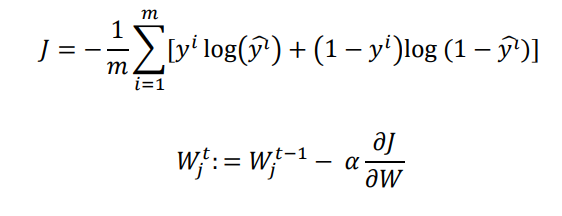

Sigmoid function

In [39]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Cost function (Binary Cross-Entropy)

In [40]:
def compute_cost(y, y_pred):
    m = len(y)
    cost = -(1 / m) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost

Gradient Descent Algorithm based on Logistic Regression

From class slides:

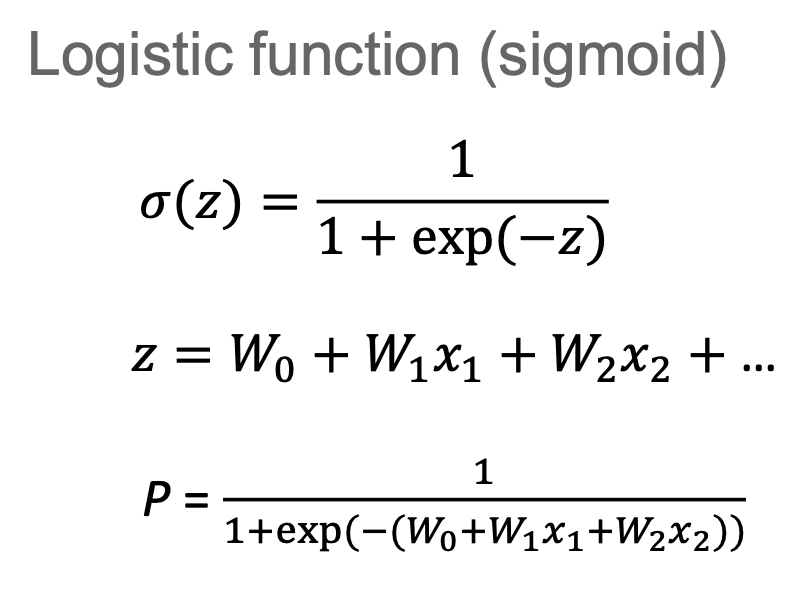

In [41]:
def gradient_descent(X, y, weights, learning_rate, epochs):
    m = X.shape[0]
    for epoch in range(epochs):
        # z as per formula
        z = np.dot(X, weights)
        y_pred = sigmoid(z)
        
        # Compute cost
        cost = compute_cost(y, y_pred)
        print(f"Epoch {epoch+1}, Cost: {cost}")
        
        # Compute gradients
        dw = (1 / m) * np.dot(X.T, (y_pred - y))
        
        # Update weights
        weights -= learning_rate * dw
    
    return weights

Prediction

In [42]:
def predict_proba(X, weights):
    z = np.dot(X, weights)
    return sigmoid(z)

Please print out the Cost function J for every iteration (until 10 epochs) for the train dataset.

Train the model

In [43]:
X_train.shape

(3390, 16)

In [44]:
y_train.shape

(3390,)

In [45]:
optimal_weights = gradient_descent(X_train, y_train, weights, learning_rate, epochs)

Epoch 1, Cost: 0.6880610518194833
Epoch 2, Cost: 0.6866415601037459
Epoch 3, Cost: 0.6852310150394908
Epoch 4, Cost: 0.6838293424474249
Epoch 5, Cost: 0.6824364688544384
Epoch 6, Cost: 0.6810523214885021
Epoch 7, Cost: 0.6796768282735101
Epoch 8, Cost: 0.6783099178240743
Epoch 9, Cost: 0.6769515194402725
Epoch 10, Cost: 0.6756015631023532


#### Predicting probabilities on train and test sets

In [46]:
# Predict probabilities for training and test sets
train_probabilities = predict_proba(X_train, optimal_weights)
test_probabilities = predict_proba(X_test, optimal_weights)

##### Evaluation

Please print out confusion matrix and its corresponding accuracy, precision, and recall for the train and test dataset after the last iteration. 

##### Confusion Matrix

In [47]:
threshold=0.5

In [48]:
def evaluate(y_true, y_pred):
    y_pred_binary = y_pred >= threshold
    tp = sum((y_true == 1) & (np.array(y_pred_binary) == 1))
    tn = sum((y_true == 0) & (np.array(y_pred_binary) == 0))
    fp = sum((y_true == 0) & (np.array(y_pred_binary) == 1))
    fn = sum((y_true == 1) & (np.array(y_pred_binary) == 0))
    
    accuracy = (tp + tn) / len(y_true)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0

    return tp, tn, fp, fn, accuracy, precision, recall

In [49]:
def print_metrics(metrics):
    print("\nConfusion Matrix:")
    print("----------------")
    print(f"            Predicted")
    print(f"             1    0")
    print(f"Actual  1  [TP:{metrics[0]:3d} FN:{metrics[3]:3d}]")
    print(f"        0  [FP:{metrics[2]:3d} TN:{metrics[1]:3d}]")

    print("\nMetrics:")
    print(f"Accuracy:  {metrics[4]:.3f}")
    print(f"Precision: {metrics[5]:.3f}")
    print(f"Recall:    {metrics[6]:.3f}")

In [50]:
# Evaluate on train dataset
print("\nTrain Dataset Evaluation:")
train_metrics = evaluate(y_train, train_probabilities)
print_metrics(train_metrics)


Train Dataset Evaluation:

Confusion Matrix:
----------------
            Predicted
             1    0
Actual  1  [TP:172 FN:344]
        0  [FP:449 TN:2425]

Metrics:
Accuracy:  0.766
Precision: 0.277
Recall:    0.333


In [51]:
# Evaluate on test dataset
print("\nTest Dataset Evaluation:")
test_metrics = evaluate(y_test, test_probabilities)
print_metrics(test_metrics)


Test Dataset Evaluation:

Confusion Matrix:
----------------
            Predicted
             1    0
Actual  1  [TP: 51 FN: 77]
        0  [FP:121 TN:599]

Metrics:
Accuracy:  0.767
Precision: 0.297
Recall:    0.398


**Function to calculate Reciever Operating Curve which depends on True Positive rate and False Positive rate**

In [52]:
def compute_roc_curve(y_true, y_prob):
    thresholds = np.linspace(0, 1, 100)
    tpr_values = []  
    fpr_values = []  

    for threshold in thresholds:
        y_pred = (y_prob >= threshold).astype(int)

        TP = np.sum((y_true == 1) & (y_pred == 1))
        TN = np.sum((y_true == 0) & (y_pred == 0))
        FP = np.sum((y_true == 0) & (y_pred == 1))
        FN = np.sum((y_true == 1) & (y_pred == 0))

        tpr = TP / (TP + FN) if (TP + FN) > 0 else 0
        fpr = FP / (FP + TN) if (FP + TN) > 0 else 0

        tpr_values.append(tpr)
        fpr_values.append(fpr)

    return fpr_values, tpr_values

**Calculating AUC-ROC**

In [53]:
def compute_auc(fpr, tpr):
    auc_value = 0.0
    
    for i in range(1, len(fpr)):
        width = abs(fpr[i] - fpr[i - 1])
        avg_height = abs((tpr[i] + tpr[i - 1]) / 2)
        auc_value += width * avg_height
    return auc_value

In [54]:
fpr_train_base, tpr_train_base = compute_roc_curve(y_train, train_probabilities)
fpr_test_base, tpr_test_base = compute_roc_curve(y_test, test_probabilities)

auc_train_base = compute_auc(fpr_train_base, tpr_train_base)
auc_test_base = compute_auc(fpr_test_base, tpr_test_base)

In [55]:
print(f"AUC for Training set: {auc_train_base:.4f}")
print(f"AUC for Test set: {auc_test_base:.4f}")

AUC for Training set: 0.6487
AUC for Test set: 0.6577


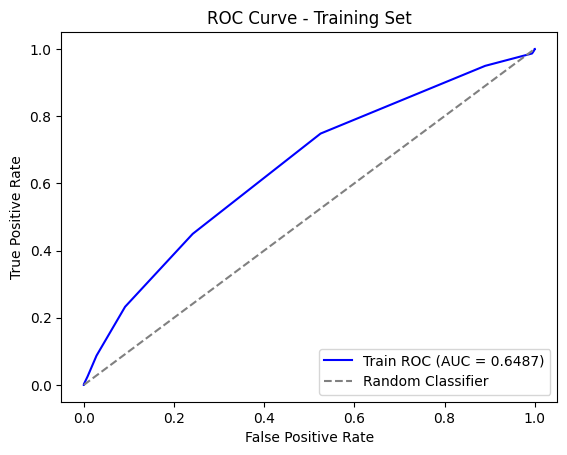

In [56]:
fig, ax = plt.subplots()
ax.plot(fpr_train_base, tpr_train_base, color='blue', label=f'Train ROC (AUC = {auc_train_base:.4f})')
ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve - Training Set')

ax.legend(loc='lower right')
plt.show()

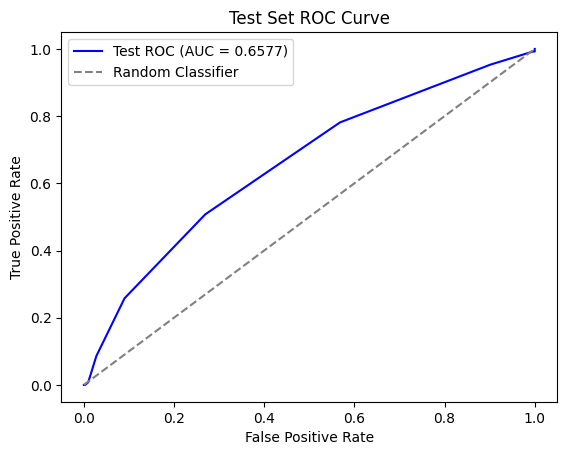

In [57]:
fig, ax = plt.subplots()

ax.plot(fpr_test_base, tpr_test_base, color='blue', label=f'Test ROC (AUC = {auc_test_base:.4f})')
ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Test Set ROC Curve')

ax.legend(loc='upper left')
plt.show()

In [58]:
class_counts = pd.Series(y_train).value_counts()
print(f"Class distribution:\n{class_counts}")

Class distribution:
0    2874
1     516
Name: count, dtype: int64


**As we have noticed already, dataset is heavily imbalanced having majority instances on class label 0 than class label 1. We have seen while model is giving good accuracy but it struggles to find a balance between Precision and Recall. This is due to the class imbalance that we many not see the accuate model's performance.**

**AUC is heavily sensitive to class imbalance and to get the best results, we must address class imbalance. There are 3 techniques to address the class imbalance, also taught in class.**

**1. Resampling\
2. SMOTE\
3. Weighted cost function**

**We will try all the techniques and see if we can improve the AUC scores**


#### Trying with class weights

In [59]:
def compute_weighted_cost(y, y_pred, class_weights):
    m = len(y)
    weighted_cost = -(1 / m) * np.sum(class_weights[y.astype(int)] * (y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)))
    return weighted_cost

In [60]:
def weighted_gradient_descent(X, y, weights, learning_rate, epochs, class_weights):
    m = X.shape[0]
    for epoch in range(epochs):
        z = np.dot(X, weights)
        y_pred = sigmoid(z)
        
        cost = compute_weighted_cost(y, y_pred, class_weights)

        if (epoch%1000 == 0 or epoch == epochs-1):
            print(f"Epoch {epoch+1}, Cost: {cost}")
        
        # Weighted gradient computation
        dw = (1 / m) * np.dot(X.T, (y_pred - y) * class_weights[y.astype(int)])
        
        weights -= learning_rate * dw
    
    return weights

In [61]:
class_weights = np.array([len(y_train) / (2 * np.bincount(y_train)[0]), 
                         len(y_train) / (2 * np.bincount(y_train)[1])])

weights = np.random.randn(X_train.shape[1]) * 0.01

# Pass the class weights to the weighted gradient descent function
optimal_weights = weighted_gradient_descent(X_train, y_train, weights, 0.1, 4000, class_weights)

Epoch 1, Cost: 0.6933832220658668
Epoch 1001, Cost: 0.6109279018007817
Epoch 2001, Cost: 0.610927822468624
Epoch 3001, Cost: 0.6109278224430538
Epoch 4000, Cost: 0.6109278224430448


In [62]:
train_predictions = predict_proba(X_train, optimal_weights)

In [63]:
test_predictions = predict_proba(X_test, optimal_weights)

In [64]:
print("\nTrain Dataset Evaluation:")
train_metrics = evaluate(y_train, train_predictions)
print_metrics(train_metrics)


Train Dataset Evaluation:

Confusion Matrix:
----------------
            Predicted
             1    0
Actual  1  [TP:344 FN:172]
        0  [FP:934 TN:1940]

Metrics:
Accuracy:  0.674
Precision: 0.269
Recall:    0.667


In [65]:
print("\nTest Dataset Evaluation:")
test_metrics = evaluate(y_test, test_predictions)
print_metrics(test_metrics)


Test Dataset Evaluation:

Confusion Matrix:
----------------
            Predicted
             1    0
Actual  1  [TP: 91 FN: 37]
        0  [FP:241 TN:479]

Metrics:
Accuracy:  0.672
Precision: 0.274
Recall:    0.711


In [66]:
fpr_train, tpr_train = compute_roc_curve(y_train, train_predictions)
fpr_test, tpr_test = compute_roc_curve(y_test, test_predictions)

auc_train = compute_auc(fpr_train, tpr_train)
auc_test = compute_auc(fpr_test, tpr_test)

In [67]:
print(f"AUC for Training set: {auc_train:.4f}")
print(f"AUC for Test set: {auc_test:.4f}")

AUC for Training set: 0.7252
AUC for Test set: 0.7579


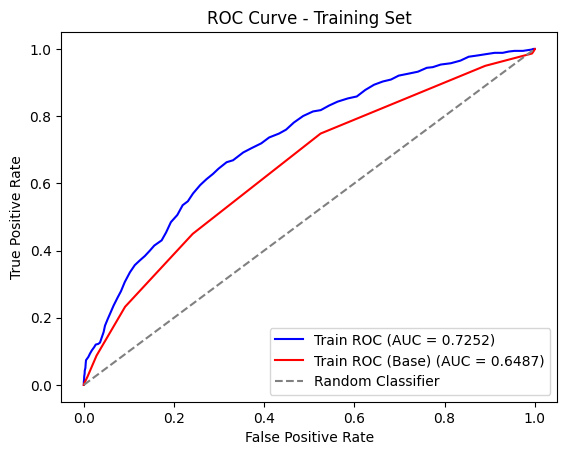

In [68]:
fig, ax = plt.subplots()
ax.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC (AUC = {auc_train:.4f})')
ax.plot(fpr_train_base, tpr_train_base, color='red', label=f'Train ROC (Base) (AUC = {auc_train_base:.4f})')
ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve - Training Set')

ax.legend(loc='lower right')
plt.show()

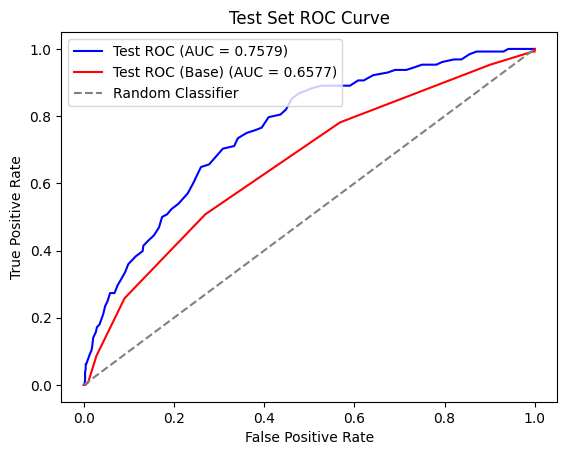

In [69]:
fig, ax = plt.subplots()

ax.plot(fpr_test, tpr_test, color='blue', label=f'Test ROC (AUC = {auc_test:.4f})')
ax.plot(fpr_test_base, tpr_test_base, color='red', label=f'Test ROC (Base) (AUC = {auc_test_base:.4f})')
ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Test Set ROC Curve')

ax.legend(loc='upper left')
plt.show()

**We notice there is an improvement in AUC using class weights. So we will try to do hyperparameter tuning to see if we can find the best weights and improve further**

### Hyperparameter Tuning with Class weights

**Trying different combinations of Learning Rates, Epochs, Regularization and Batch Sizes**

In [70]:
learning_rates = [0.001, 0.0001]
epochs_list = [5000, 10000]
lambda_regs = [0.01, 0.1]
batch_sizes = [50, 100]

best_weights_tuned = None
best_accuracy_tuned = 0
best_params = {}

In [71]:
def compute_weighted_cost(y, y_pred, class_weights, weights, lambda_reg):
    m = len(y)
    weighted_cost = -(1 / m) * np.sum(class_weights[y.astype(int)] * (y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)))
    reg_cost = (lambda_reg / (2 * m)) * np.sum(np.square(weights))
    return weighted_cost + reg_cost

In [72]:
def weighted_gradient_descent(X, y, weights, learning_rate, epochs, class_weights, lambda_reg, batch_size):
    m, n = X.shape
    for epoch in range(epochs):
        permutation = np.random.permutation(m)
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]

        total_batches = (m + batch_size - 1) // batch_size

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]
        
            z = np.dot(X_batch, weights)
            y_pred = sigmoid(z)
        
            cost = compute_weighted_cost(y_batch, y_pred, class_weights, weights, lambda_reg)
            current_batch = i // batch_size + 1

            if (epoch%1000 == 0 or epoch == epochs-1):
                if (current_batch == total_batches):
                    print(f"Epoch {epoch+1}, Batch {current_batch}/{total_batches}, Cost: {cost}")
        
            dw = (1 / m) * np.dot(X_batch.T, (y_pred - y_batch) * class_weights[y_batch.astype(int)]) + (lambda_reg / m) * weights
        
            weights -= learning_rate * dw
    
    return weights

In [73]:
print("Starting Hyperparameter Tuning")
print("------------------------------")
for lr in learning_rates:
    for epochs in epochs_list:
        for lambda_reg in lambda_regs:
            for batch_size in batch_sizes:
                print("Parameter Set:")
                print(f"Learning Rate: {lr}, Epochs: {epochs}, Lambda: {lambda_reg}, Batch Size: {batch_size}")
                print("------------")
                weights = np.random.randn(X_train.shape[1]) * 0.01
                weights = weighted_gradient_descent(X_train, y_train, weights, lr, epochs, class_weights, lambda_reg, batch_size)
                y_pred = predict_proba(X_train, weights)
                y_pred_labels = (y_pred >= 0.5).astype(int) 
                accuracy = np.mean(y_pred_labels == y_train)
                print(f"Accuracy: {accuracy}")
                print("------------")
                
                if accuracy > best_accuracy_tuned:
                    best_accuracy_tuned = accuracy
                    best_weights_tuned = weights
                    best_params = {'learning_rate': lr, 'epochs': epochs, 'lambda': lambda_reg, 'batch_size': batch_size}

print(f"Best Parameters: {best_params}, Best Accuracy: {best_accuracy_tuned}")

Starting Hyperparameter Tuning
------------------------------
Parameter Set:
Learning Rate: 0.001, Epochs: 5000, Lambda: 0.01, Batch Size: 50
------------
Epoch 1, Batch 68/68, Cost: 0.5422408046615245
Epoch 1001, Batch 68/68, Cost: 0.5221422365177876
Epoch 2001, Batch 68/68, Cost: 0.9244396809617803
Epoch 3001, Batch 68/68, Cost: 0.44409080756773545
Epoch 4001, Batch 68/68, Cost: 0.6502853479229532
Epoch 5000, Batch 68/68, Cost: 0.4517694333252462
Accuracy: 0.644542772861357
------------
Parameter Set:
Learning Rate: 0.001, Epochs: 5000, Lambda: 0.01, Batch Size: 100
------------
Epoch 1, Batch 34/34, Cost: 0.6178308682127627
Epoch 1001, Batch 34/34, Cost: 0.7228256969218099
Epoch 2001, Batch 34/34, Cost: 0.6046072162658578
Epoch 3001, Batch 34/34, Cost: 0.5539889740885027
Epoch 4001, Batch 34/34, Cost: 0.7158759336683582
Epoch 5000, Batch 34/34, Cost: 0.47720451332835495
Accuracy: 0.6427728613569321
------------
Parameter Set:
Learning Rate: 0.001, Epochs: 5000, Lambda: 0.1, Batch Si

In [74]:
train_predictions = predict_proba(X_train, best_weights_tuned)
test_predictions = predict_proba(X_test, best_weights_tuned)

In [75]:
print("\nTrain Dataset Evaluation:")
train_metrics = evaluate(y_train, train_predictions)
print_metrics(train_metrics)


Train Dataset Evaluation:

Confusion Matrix:
----------------
            Predicted
             1    0
Actual  1  [TP:349 FN:167]
        0  [FP:993 TN:1881]

Metrics:
Accuracy:  0.658
Precision: 0.260
Recall:    0.676


In [76]:
print("\nTest Dataset Evaluation:")
test_metrics = evaluate(y_test, test_predictions)
print_metrics(test_metrics)


Test Dataset Evaluation:

Confusion Matrix:
----------------
            Predicted
             1    0
Actual  1  [TP: 94 FN: 34]
        0  [FP:251 TN:469]

Metrics:
Accuracy:  0.664
Precision: 0.272
Recall:    0.734


In [77]:
fpr_train, tpr_train = compute_roc_curve(y_train, train_predictions)
fpr_test, tpr_test = compute_roc_curve(y_test, test_predictions)

auc_train = compute_auc(fpr_train, tpr_train)
auc_test = compute_auc(fpr_test, tpr_test)

In [78]:
print(f"AUC for Training set: {auc_train:.4f}")
print(f"AUC for Test set: {auc_test:.4f}")

AUC for Training set: 0.7240
AUC for Test set: 0.7606


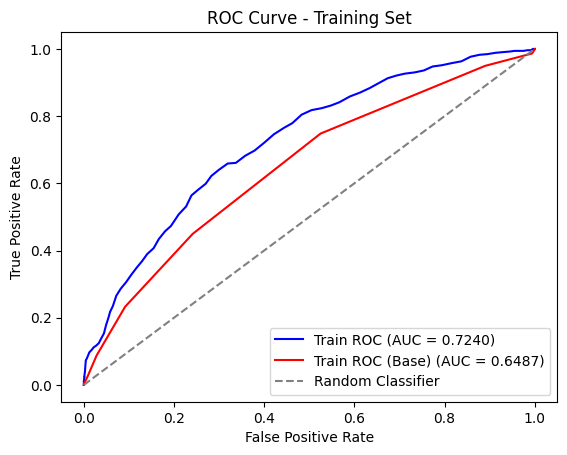

In [79]:
fig, ax = plt.subplots()
ax.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC (AUC = {auc_train:.4f})')
ax.plot(fpr_train_base, tpr_train_base, color='red', label=f'Train ROC (Base) (AUC = {auc_train_base:.4f})')
ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve - Training Set')

ax.legend(loc='lower right')
plt.show()

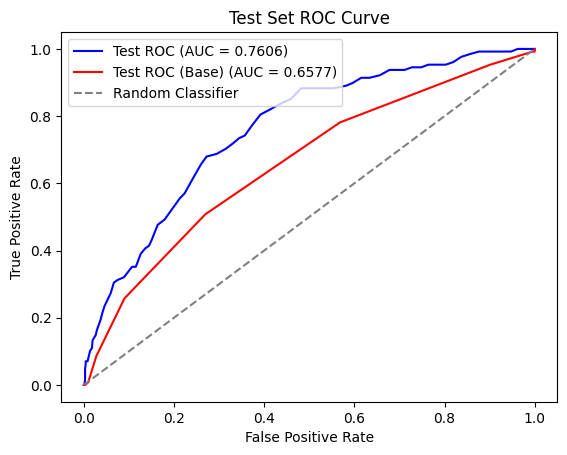

In [80]:
fig, ax = plt.subplots()

ax.plot(fpr_test, tpr_test, color='blue', label=f'Test ROC (AUC = {auc_test:.4f})')
ax.plot(fpr_test_base, tpr_test_base, color='red', label=f'Test ROC (Base) (AUC = {auc_test_base:.4f})')
ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Test Set ROC Curve')

ax.legend(loc='upper left')
plt.show()

**With Hyperparameter tuning we see that there is an improvement on unseen data with an increase in the AUC. We will next try to do Oversampling for the minority class.**

### Resampling: Oversampling the minority class to match the majority class

In [81]:
class_0_indices = np.where(y_train == 0)[0]
class_1_indices = np.where(y_train == 1)[0]


In [82]:
def oversample(X, y):
    if len(class_0_indices) > len(class_1_indices):
        majority_class_indices = class_0_indices
        minority_class_indices = class_1_indices
    else:
        majority_class_indices = class_1_indices
        minority_class_indices = class_0_indices
    
    num_to_add = len(majority_class_indices) - len(minority_class_indices)
    oversample_indices = np.random.choice(minority_class_indices, size=num_to_add, replace=True)
    oversampled_indices = np.concatenate([majority_class_indices, minority_class_indices, oversample_indices])
    np.random.shuffle(oversampled_indices)
    X_balanced = X[oversampled_indices]
    y_balanced = y[oversampled_indices]
    
    return X_balanced, y_balanced

In [83]:
X_train_oversampled, y_train_oversampled = oversample(X_train, y_train)
print("Oversampling completed. The dataset is now balanced.")

Oversampling completed. The dataset is now balanced.


In [84]:
class_counts = pd.Series(y_train_oversampled).value_counts()
print(f"Class distribution:\n{class_counts}")

Class distribution:
0    2874
1    2874
Name: count, dtype: int64


In [85]:
weights = np.random.randn(X_train.shape[1]) * 0.01

m, n = X_train.shape
learning_rate = 0.01
epochs = 4000

In [86]:
def gradient_descent_oversample(X, y, weights, learning_rate, epochs):
    m = X.shape[0]
    for epoch in range(epochs):
        z = np.dot(X, weights)
        y_pred = sigmoid(z)
        cost = compute_cost(y, y_pred)
        if (epoch%1000 == 0 or epoch == epochs-1):
            print(f"Epoch {epoch+1}, Cost: {cost}")
        dw = (1 / m) * np.dot(X.T, (y_pred - y))
        weights -= learning_rate * dw
    return weights

In [87]:
optimal_weights_oversample = gradient_descent_oversample(X_train_oversampled, y_train_oversampled, weights, learning_rate, epochs)

Epoch 1, Cost: 0.6950369779994453
Epoch 1001, Cost: 0.6114976417066602
Epoch 2001, Cost: 0.6102543410276793
Epoch 3001, Cost: 0.6101720166857485
Epoch 4000, Cost: 0.6101630311421571


In [88]:
train_predictions_oversample = predict_proba(X_train_oversampled, optimal_weights_oversample)
test_predictions_oversample = predict_proba(X_test, optimal_weights_oversample)

In [89]:
print("\nTrain Dataset Evaluation:")
train_metrics_oversample = evaluate(y_train_oversampled, train_predictions_oversample)
print_metrics(train_metrics_oversample)

print("\nTest Dataset Evaluation:")
test_metrics_oversample = evaluate(y_test, test_predictions_oversample)
print_metrics(test_metrics_oversample)


Train Dataset Evaluation:

Confusion Matrix:
----------------
            Predicted
             1    0
Actual  1  [TP:1918 FN:956]
        0  [FP:929 TN:1945]

Metrics:
Accuracy:  0.672
Precision: 0.674
Recall:    0.667

Test Dataset Evaluation:

Confusion Matrix:
----------------
            Predicted
             1    0
Actual  1  [TP: 90 FN: 38]
        0  [FP:244 TN:476]

Metrics:
Accuracy:  0.667
Precision: 0.269
Recall:    0.703


In [90]:
fpr_train_oversample, tpr_train_oversample = compute_roc_curve(y_train_oversampled, train_predictions_oversample)
fpr_test_oversample, tpr_test_oversample = compute_roc_curve(y_test, test_predictions_oversample)

auc_train_oversample = compute_auc(fpr_train_oversample, tpr_train_oversample)
auc_test_oversample = compute_auc(fpr_test_oversample, tpr_test_oversample)

In [91]:
print(f"AUC for Training set: {auc_train_oversample:.4f}")
print(f"AUC for Test set: {auc_test_oversample:.4f}")

AUC for Training set: 0.7255
AUC for Test set: 0.7531


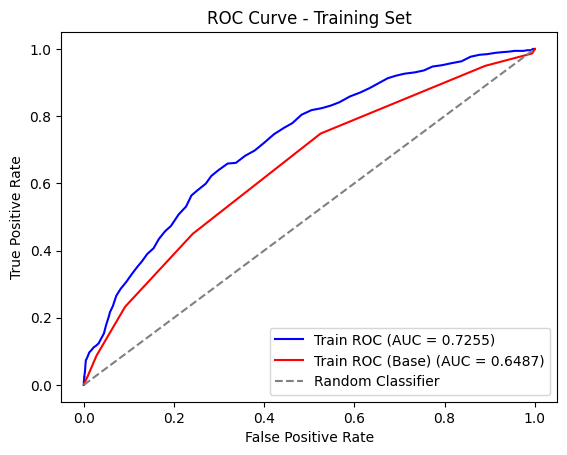

In [92]:
fig, ax = plt.subplots()
ax.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC (AUC = {auc_train_oversample:.4f})')
ax.plot(fpr_train_base, tpr_train_base, color='red', label=f'Train ROC (Base) (AUC = {auc_train_base:.4f})')
ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve - Training Set')

ax.legend(loc='lower right')
plt.show()

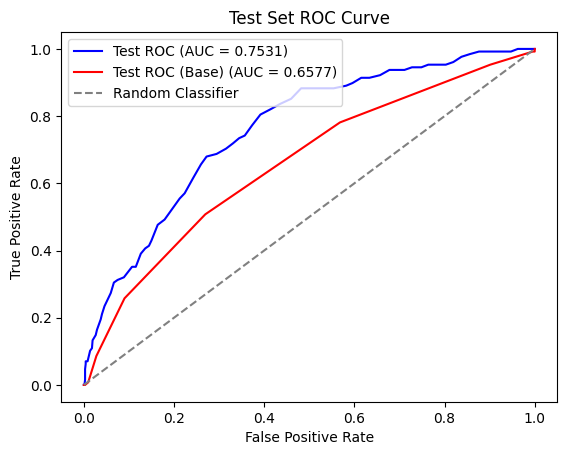

In [93]:
fig, ax = plt.subplots()

ax.plot(fpr_test, tpr_test, color='blue', label=f'Test ROC (AUC = {auc_test_oversample:.4f})')
ax.plot(fpr_test_base, tpr_test_base, color='red', label=f'Test ROC (Base) (AUC = {auc_test_base:.4f})')
ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Test Set ROC Curve')

ax.legend(loc='upper left')
plt.show()

**With Oversampling for minority class we see improvement in AUC for test dataset. So next we will try to undersample the majority class and see.**

### Resampling: Undersampling the majority class to match the minority class

In [94]:
class_0_indices = np.where(y_train == 0)[0]
class_1_indices = np.where(y_train == 1)[0]

In [95]:
if len(class_0_indices) > len(class_1_indices):
    majority_undersample_indices = np.random.choice(class_0_indices, size=len(class_1_indices), replace=False)
    undersampled_indices = np.concatenate([majority_undersample_indices, class_1_indices])
    np.random.shuffle(undersampled_indices)
    X_train_balanced = X_train[undersampled_indices]
    y_train_balanced = y_train[undersampled_indices]
    print("Undersampling completed. The dataset is now balanced.")
else:
    X_train_balanced = X_train
    y_train_balanced = y_train
    print("No undersampling needed, the dataset is already balanced.")

Undersampling completed. The dataset is now balanced.


In [96]:
class_counts = pd.Series(y_train_balanced).value_counts()
print(f"Class distribution:\n{class_counts}")

Class distribution:
0    516
1    516
Name: count, dtype: int64


In [97]:
weights = np.random.randn(X_train.shape[1]) * 0.01

m, n = X_train.shape
learning_rate = 0.01
epochs = 4000

In [98]:
def gradient_descent_unsample(X, y, weights, learning_rate, epochs):
    m = X.shape[0]
    for epoch in range(epochs):
        z = np.dot(X, weights)
        y_pred = sigmoid(z)
        cost = compute_cost(y, y_pred)
        if (epoch%1000 == 0 or epoch == epochs-1):
            print(f"Epoch {epoch+1}, Cost: {cost}")
        dw = (1 / m) * np.dot(X.T, (y_pred - y))
        weights -= learning_rate * dw
    return weights

In [99]:
optimal_weights_unsample = gradient_descent_unsample(X_train_balanced, y_train_balanced, weights, learning_rate, epochs)

Epoch 1, Cost: 0.6917625522031641
Epoch 1001, Cost: 0.6066556236755004
Epoch 2001, Cost: 0.6050823768828413
Epoch 3001, Cost: 0.6048768200201433
Epoch 4000, Cost: 0.6048233071919349


In [100]:
train_predictions_unsample = predict_proba(X_train_balanced, optimal_weights_unsample)
test_predictions_unsample = predict_proba(X_test, optimal_weights_unsample)

In [101]:
print("\nTrain Dataset Evaluation:")
train_metrics_unsample = evaluate(y_train_balanced, train_predictions_unsample)
print_metrics(train_metrics_unsample)

print("\nTest Dataset Evaluation:")
test_metrics_unsample = evaluate(y_test, test_predictions_unsample)
print_metrics(test_metrics_unsample)


Train Dataset Evaluation:

Confusion Matrix:
----------------
            Predicted
             1    0
Actual  1  [TP:342 FN:174]
        0  [FP:155 TN:361]

Metrics:
Accuracy:  0.681
Precision: 0.688
Recall:    0.663

Test Dataset Evaluation:

Confusion Matrix:
----------------
            Predicted
             1    0
Actual  1  [TP: 92 FN: 36]
        0  [FP:239 TN:481]

Metrics:
Accuracy:  0.676
Precision: 0.278
Recall:    0.719


In [102]:
fpr_train_unsample, tpr_train_unsample = compute_roc_curve(y_train_balanced, train_predictions_unsample)
fpr_test_unsample, tpr_test_unsample = compute_roc_curve(y_test, test_predictions_unsample)

auc_train_unsample = compute_auc(fpr_train_unsample, tpr_train_unsample)
auc_test_unsample = compute_auc(fpr_test_unsample, tpr_test_unsample)

In [103]:
print(f"AUC for Training set: {auc_train_unsample:.4f}")
print(f"AUC for Test set: {auc_test_unsample:.4f}")

AUC for Training set: 0.7336
AUC for Test set: 0.7518


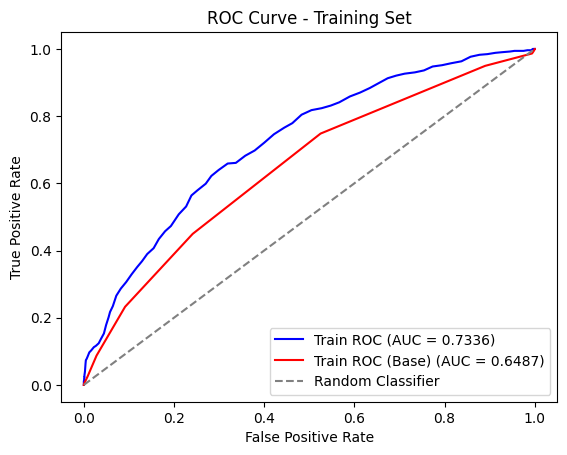

In [104]:
fig, ax = plt.subplots()
ax.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC (AUC = {auc_train_unsample:.4f})')
ax.plot(fpr_train_base, tpr_train_base, color='red', label=f'Train ROC (Base) (AUC = {auc_train_base:.4f})')
ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve - Training Set')

ax.legend(loc='lower right')
plt.show()

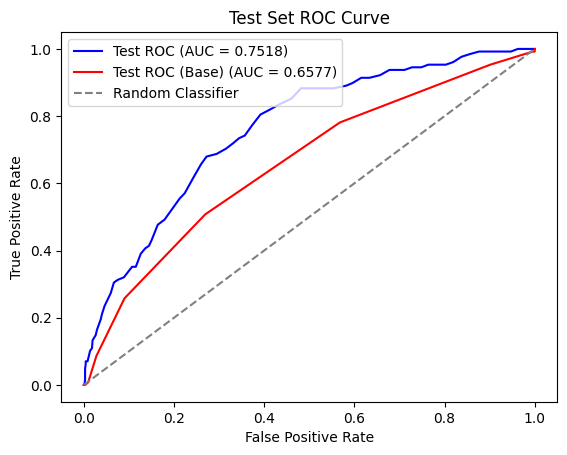

In [105]:
fig, ax = plt.subplots()

ax.plot(fpr_test, tpr_test, color='blue', label=f'Test ROC (AUC = {auc_test_unsample:.4f})')
ax.plot(fpr_test_base, tpr_test_base, color='red', label=f'Test ROC (Base) (AUC = {auc_test_base:.4f})')
ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Test Set ROC Curve')

ax.legend(loc='upper left')
plt.show()

**With Undersampling also we see a good improvement on training dataset, however, not much difference with test dataset. Next we will try to generate synthetic samples using SMOTE**

### SMOTE (Synthetic Minority Over-sampling Technique):

**This method involves generating new synthetic samples for the minority class. : SMOTE finds the k-nearest neighbors of the selected minority class sample and generates synthetic sample by interpolating between the selected minority class sample and one of its k-nearest neighbors.**

In [106]:
print(f"X_train.shape = {X_train.shape}")
print(f"y_train.shape = {y_train.shape}")
print(f"X_test.shape = {X_test.shape}")
print(f"y_test.shape = {y_test.shape}")

X_train.shape = (3390, 16)
y_train.shape = (3390,)
X_test.shape = (848, 16)
y_test.shape = (848,)


In [107]:
def smote(X, y, minority_class=1, majority_class=0, N=100, k=5):
    minority_indices = np.where(y == minority_class)[0]
    majority_indices = np.where(y == majority_class)[0]
    X_minority = X[minority_indices]

    def euclidean_distance(a, b):
        return np.sqrt(np.sum((a - b) ** 2))
    
    def find_k_nearest_neighbors(X, sample, k):
        distances = np.array([euclidean_distance(sample, x) for x in X])
        return distances.argsort()[:k]
    
    n_minority = len(minority_indices)
    n_majority = len(majority_indices)
    n_synthetic_samples = n_majority - n_minority
    
    synthetic_samples = []
    for i in range(n_synthetic_samples):
        idx = np.random.randint(0, n_minority)
        neighbors = find_k_nearest_neighbors(X_minority, X_minority[idx], k)
        neighbor = np.random.choice(neighbors)
        diff = X_minority[neighbor] - X_minority[idx]
        gap = np.random.rand()
        synthetic_sample = X_minority[idx] + gap * diff
        synthetic_samples.append(synthetic_sample)
    
    synthetic_samples = np.array(synthetic_samples)
    y_synthetic = np.array([minority_class] * len(synthetic_samples))
    
    return np.vstack((X, synthetic_samples)), np.concatenate((y, y_synthetic))

In [108]:
X_train_smote, y_train_smote = smote(X_train, y_train, minority_class=1, majority_class=0, k=5)

print("SMOTE completed. The dataset is now balanced.")
print(f"Class distribution after SMOTE: {np.bincount(y_train_smote)}")

SMOTE completed. The dataset is now balanced.
Class distribution after SMOTE: [2874 2874]


In [109]:
print(f"X_train.shape = {X_train.shape}")
print(f"y_train.shape = {y_train.shape}")
print(f"X_test.shape = {X_test.shape}")
print(f"y_test.shape = {y_test.shape}")
print(f"X_train_smote.shape = {X_train_smote.shape}")
print(f"y_train_smote.shape = {y_train_smote.shape}")

X_train.shape = (3390, 16)
y_train.shape = (3390,)
X_test.shape = (848, 16)
y_test.shape = (848,)
X_train_smote.shape = (5748, 16)
y_train_smote.shape = (5748,)


In [110]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_weighted_cost(y_true, y_pred, weights, lambda_reg):
    m = len(y_true)
    cost = -1/m * (np.dot(y_true, np.log(y_pred)) + np.dot(1 - y_true, np.log(1 - y_pred)))
    reg_cost = (lambda_reg / (2 * m)) * np.sum(np.square(weights[1:]))  # Do not regularize the bias term
    return cost + reg_cost

def predict_proba(X, weights):
    return sigmoid(np.dot(X, weights))

In [111]:
def gradient_descent_smote(X, y, weights, learning_rate, epochs, lambda_reg, batch_size):
    m, n = X.shape

    for epoch in range(epochs):
        permutation = np.random.permutation(m)
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]
            batch_size_actual = X_batch.shape[0]

            z = np.dot(X_batch, weights)
            y_pred = sigmoid(z)

            error = y_pred - y_batch
            dw = np.dot(X_batch.T, error) / batch_size_actual
            dw[1:] += (lambda_reg / batch_size_actual) * weights[1:] 

            weights -= learning_rate * dw

        if epoch % 1000 == 0 or epoch == epochs - 1:
            cost = compute_weighted_cost(y_shuffled, sigmoid(np.dot(X_shuffled, weights)), weights, lambda_reg)
            print(f"Epoch {epoch + 1}, Cost: {cost}")

    return weights


#### Hyperparameter Tuning with balanced dataset

In [112]:
weights = np.random.randn(X_train_smote.shape[1]) * 0.01
learning_rates = [0.001, 0.0001]
epochs_list = [5000, 10000]
lambda_regs = [0.01, 0.02]
batch_sizes = [50, 100]

In [113]:
best_weights_tuned = None
best_accuracy_tuned = 0
best_params = {}

print("Starting Hyperparameter Tuning")
print("------------------------------")
for lr in learning_rates:
    for epochs in epochs_list:
        for lambda_reg in lambda_regs:
            for batch_size in batch_sizes:
                print("Parameter Set:")
                print(f"Learning Rate: {lr}, Epochs: {epochs}, Lambda: {lambda_reg}, Batch Size: {batch_size}")
                print("------------")
                weights = np.random.randn(X_train_smote.shape[1]) * 0.01
                weights = gradient_descent_smote(X_train_smote, y_train_smote, weights, lr, epochs, lambda_reg, batch_size)
                y_pred = predict_proba(X_train_smote, weights)
                y_pred_labels = (y_pred >= 0.5).astype(int)
                accuracy = np.mean(y_pred_labels == y_train_smote)
                print(f"Accuracy: {accuracy}")
                print("------------")
                
                if accuracy > best_accuracy_tuned:
                    best_accuracy_tuned = accuracy
                    best_weights_tuned = weights
                    best_params = {'learning_rate': lr, 'epochs': epochs, 'lambda': lambda_reg, 'batch_size': batch_size}

print(f"Best Parameters: {best_params}, Best Accuracy: {best_accuracy_tuned}")

Starting Hyperparameter Tuning
------------------------------
Parameter Set:
Learning Rate: 0.001, Epochs: 5000, Lambda: 0.01, Batch Size: 50
------------
Epoch 1, Cost: 0.6844161183646976
Epoch 1001, Cost: 0.6089391796743397
Epoch 2001, Cost: 0.6089391930943228
Epoch 3001, Cost: 0.6089391764823018
Epoch 4001, Cost: 0.6089391723464023
Epoch 5000, Cost: 0.6089391717482148
Accuracy: 0.6699721642310369
------------
Parameter Set:
Learning Rate: 0.001, Epochs: 5000, Lambda: 0.01, Batch Size: 100
------------
Epoch 1, Cost: 0.6865144527470639
Epoch 1001, Cost: 0.6089396770541489
Epoch 2001, Cost: 0.6089391768251738
Epoch 3001, Cost: 0.6089391917439164
Epoch 4001, Cost: 0.6089392843854908
Epoch 5000, Cost: 0.608939189060732
Accuracy: 0.6697981906750174
------------
Parameter Set:
Learning Rate: 0.001, Epochs: 5000, Lambda: 0.02, Batch Size: 50
------------
Epoch 1, Cost: 0.6815809303240502
Epoch 1001, Cost: 0.6089398816541859
Epoch 2001, Cost: 0.608939859902291
Epoch 3001, Cost: 0.6089398558

In [114]:
best_weights_tuned

array([-0.25278845,  0.29657538,  0.60760043, -0.04961234,  0.07522668,
        0.17097742,  0.06459684,  0.06044555,  0.08300638,  0.05159403,
        0.06579589,  0.22765704,  0.04192543, -0.0246796 , -0.03056233,
        0.04688195])

In [115]:
# After tuning, use the best weights to make predictions
train_predictions_smote = predict_proba(X_train_smote, best_weights_tuned)
test_predictions_smote = predict_proba(X_test, best_weights_tuned)

In [116]:
print("\nTrain Dataset Evaluation:")
train_metrics = evaluate(y_train_smote, train_predictions_smote)
print_metrics(train_metrics)


Train Dataset Evaluation:

Confusion Matrix:
----------------
            Predicted
             1    0
Actual  1  [TP:1938 FN:936]
        0  [FP:959 TN:1915]

Metrics:
Accuracy:  0.670
Precision: 0.669
Recall:    0.674


In [117]:
print("\nTest Dataset Evaluation:")
test_metrics = evaluate(y_test, test_predictions_smote)
print_metrics(test_metrics)


Test Dataset Evaluation:

Confusion Matrix:
----------------
            Predicted
             1    0
Actual  1  [TP: 94 FN: 34]
        0  [FP:242 TN:478]

Metrics:
Accuracy:  0.675
Precision: 0.280
Recall:    0.734


In [118]:
fpr_train, tpr_train = compute_roc_curve(y_train_smote, train_predictions_smote)
fpr_test, tpr_test = compute_roc_curve(y_test, test_predictions_smote)

auc_train = compute_auc(fpr_train, tpr_train)
auc_test = compute_auc(fpr_test, tpr_test)

In [119]:
print(f"AUC for Training set: {auc_train:.4f}")
print(f"AUC for Test set: {auc_test:.4f}")

AUC for Training set: 0.7272
AUC for Test set: 0.7591


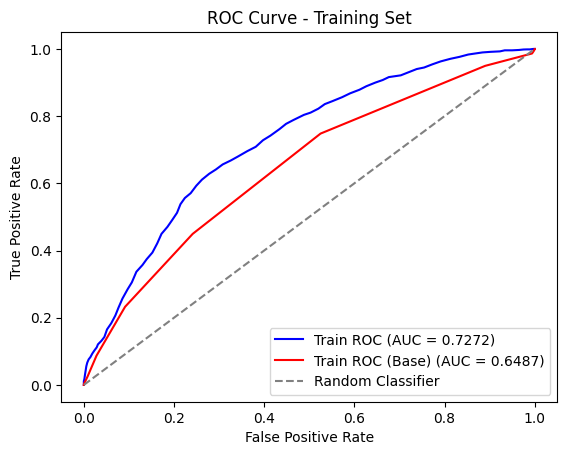

In [120]:
fig, ax = plt.subplots()
ax.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC (AUC = {auc_train:.4f})')
ax.plot(fpr_train_base, tpr_train_base, color='red', label=f'Train ROC (Base) (AUC = {auc_train_base:.4f})')
ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve - Training Set')

ax.legend(loc='lower right')
plt.show()

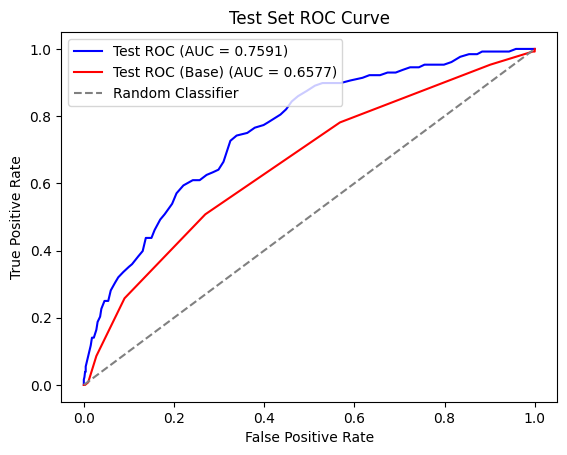

In [121]:
fig, ax = plt.subplots()

ax.plot(fpr_test, tpr_test, color='blue', label=f'Test ROC (AUC = {auc_test:.4f})')
ax.plot(fpr_test_base, tpr_test_base, color='red', label=f'Test ROC (Base) (AUC = {auc_test_base:.4f})')
ax.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Test Set ROC Curve')

ax.legend(loc='upper left')
plt.show()

**Using Smote we see an improvement in the overall score. However, as compared to other methods tested its at par with the improvements we saw earlier. Overall, with different techniques tested, we were able to improve on the AUC score**

### Comparing Metrics across all models

**We see an improvement with all the techniques used. With use cases involving Healthcare Sector, Recall is an extremely important metrics as False negatives are more critical in healthcare. With that in mind, if we check our models we see an improvement in Recall for all models.Overall, we see from AUC-ROC curves that with the techniques used, the performances have improved**

## Thank You